# Figure S7. Embedding of the E-I ratio developmental pattern in the IMAGEN dataset along the sensorimotor-association axis

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR and $IMAGEN_PROJECT_DIR

In [2]:
import os
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multitest

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
}
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot, stats, datasets

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({"font.size": 12, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = "#44546A"
red = matplotlib.cm.get_cmap("RdBu_r")(240)
blue = matplotlib.cm.get_cmap("RdBu_r")(15)
parcels = transform.load_ordered_parcel_labels("schaefer-100")

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load age effects map:

In [3]:
stats_age_imagen = pd.read_csv(
    "p_imagen_fc-ses_sc-FU2_runs-2_IE_age_stats.csv", index_col=0
)

## A. Spatial correlation with the sensorimotor-association axis

Load maps:

In [4]:
maps = datasets.load_maps("schaefer-100", "sydnor2021")

map_names = [
    "SA Axis",
    "T1w/T2w",
    "FC G1",
    "Evo. expansion",
    "Allometric scaling",
    r"O$^{2}$ CMR",
    "Glu. CMR",
    "CBF",
    "Gene PC1",
    "NeuroSynth PC1",
    "LTC G1",
    "Thickness",
]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Spin test:

In [21]:
r_aget_maps, p_aget_maps, _ = stats.spin_test_parcellated(
    maps, stats_age_imagen[["t"]], "schaefer-100", n_perm=1000
)
print("Correlation coefficients\n", r_aget_maps, "\nSpin p-values\n", p_aget_maps)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficients
      SAaxis  myelinmap  fcgradient01   evoexp  scalingpnc     cmr02   cmruglu  \
t -0.607301   0.548002     -0.640855 -0.40201   -0.344884  0.343282 -0.001052   

    meancbf   genepc1    cogpc1     ltcg1  thickness  
t  0.035505  0.486835  0.347994 -0.059616  -0.340071   
Spin p-values
    SAaxis  myelinmap  fcgradient01  evoexp  scalingpnc  cmr02  cmruglu  \
t     0.0        0.0           0.0     0.0         0.0  0.001    0.991   

   meancbf  genepc1  cogpc1  ltcg1  thickness  
t    0.757      0.0   0.006  0.532      0.002  


Plot:

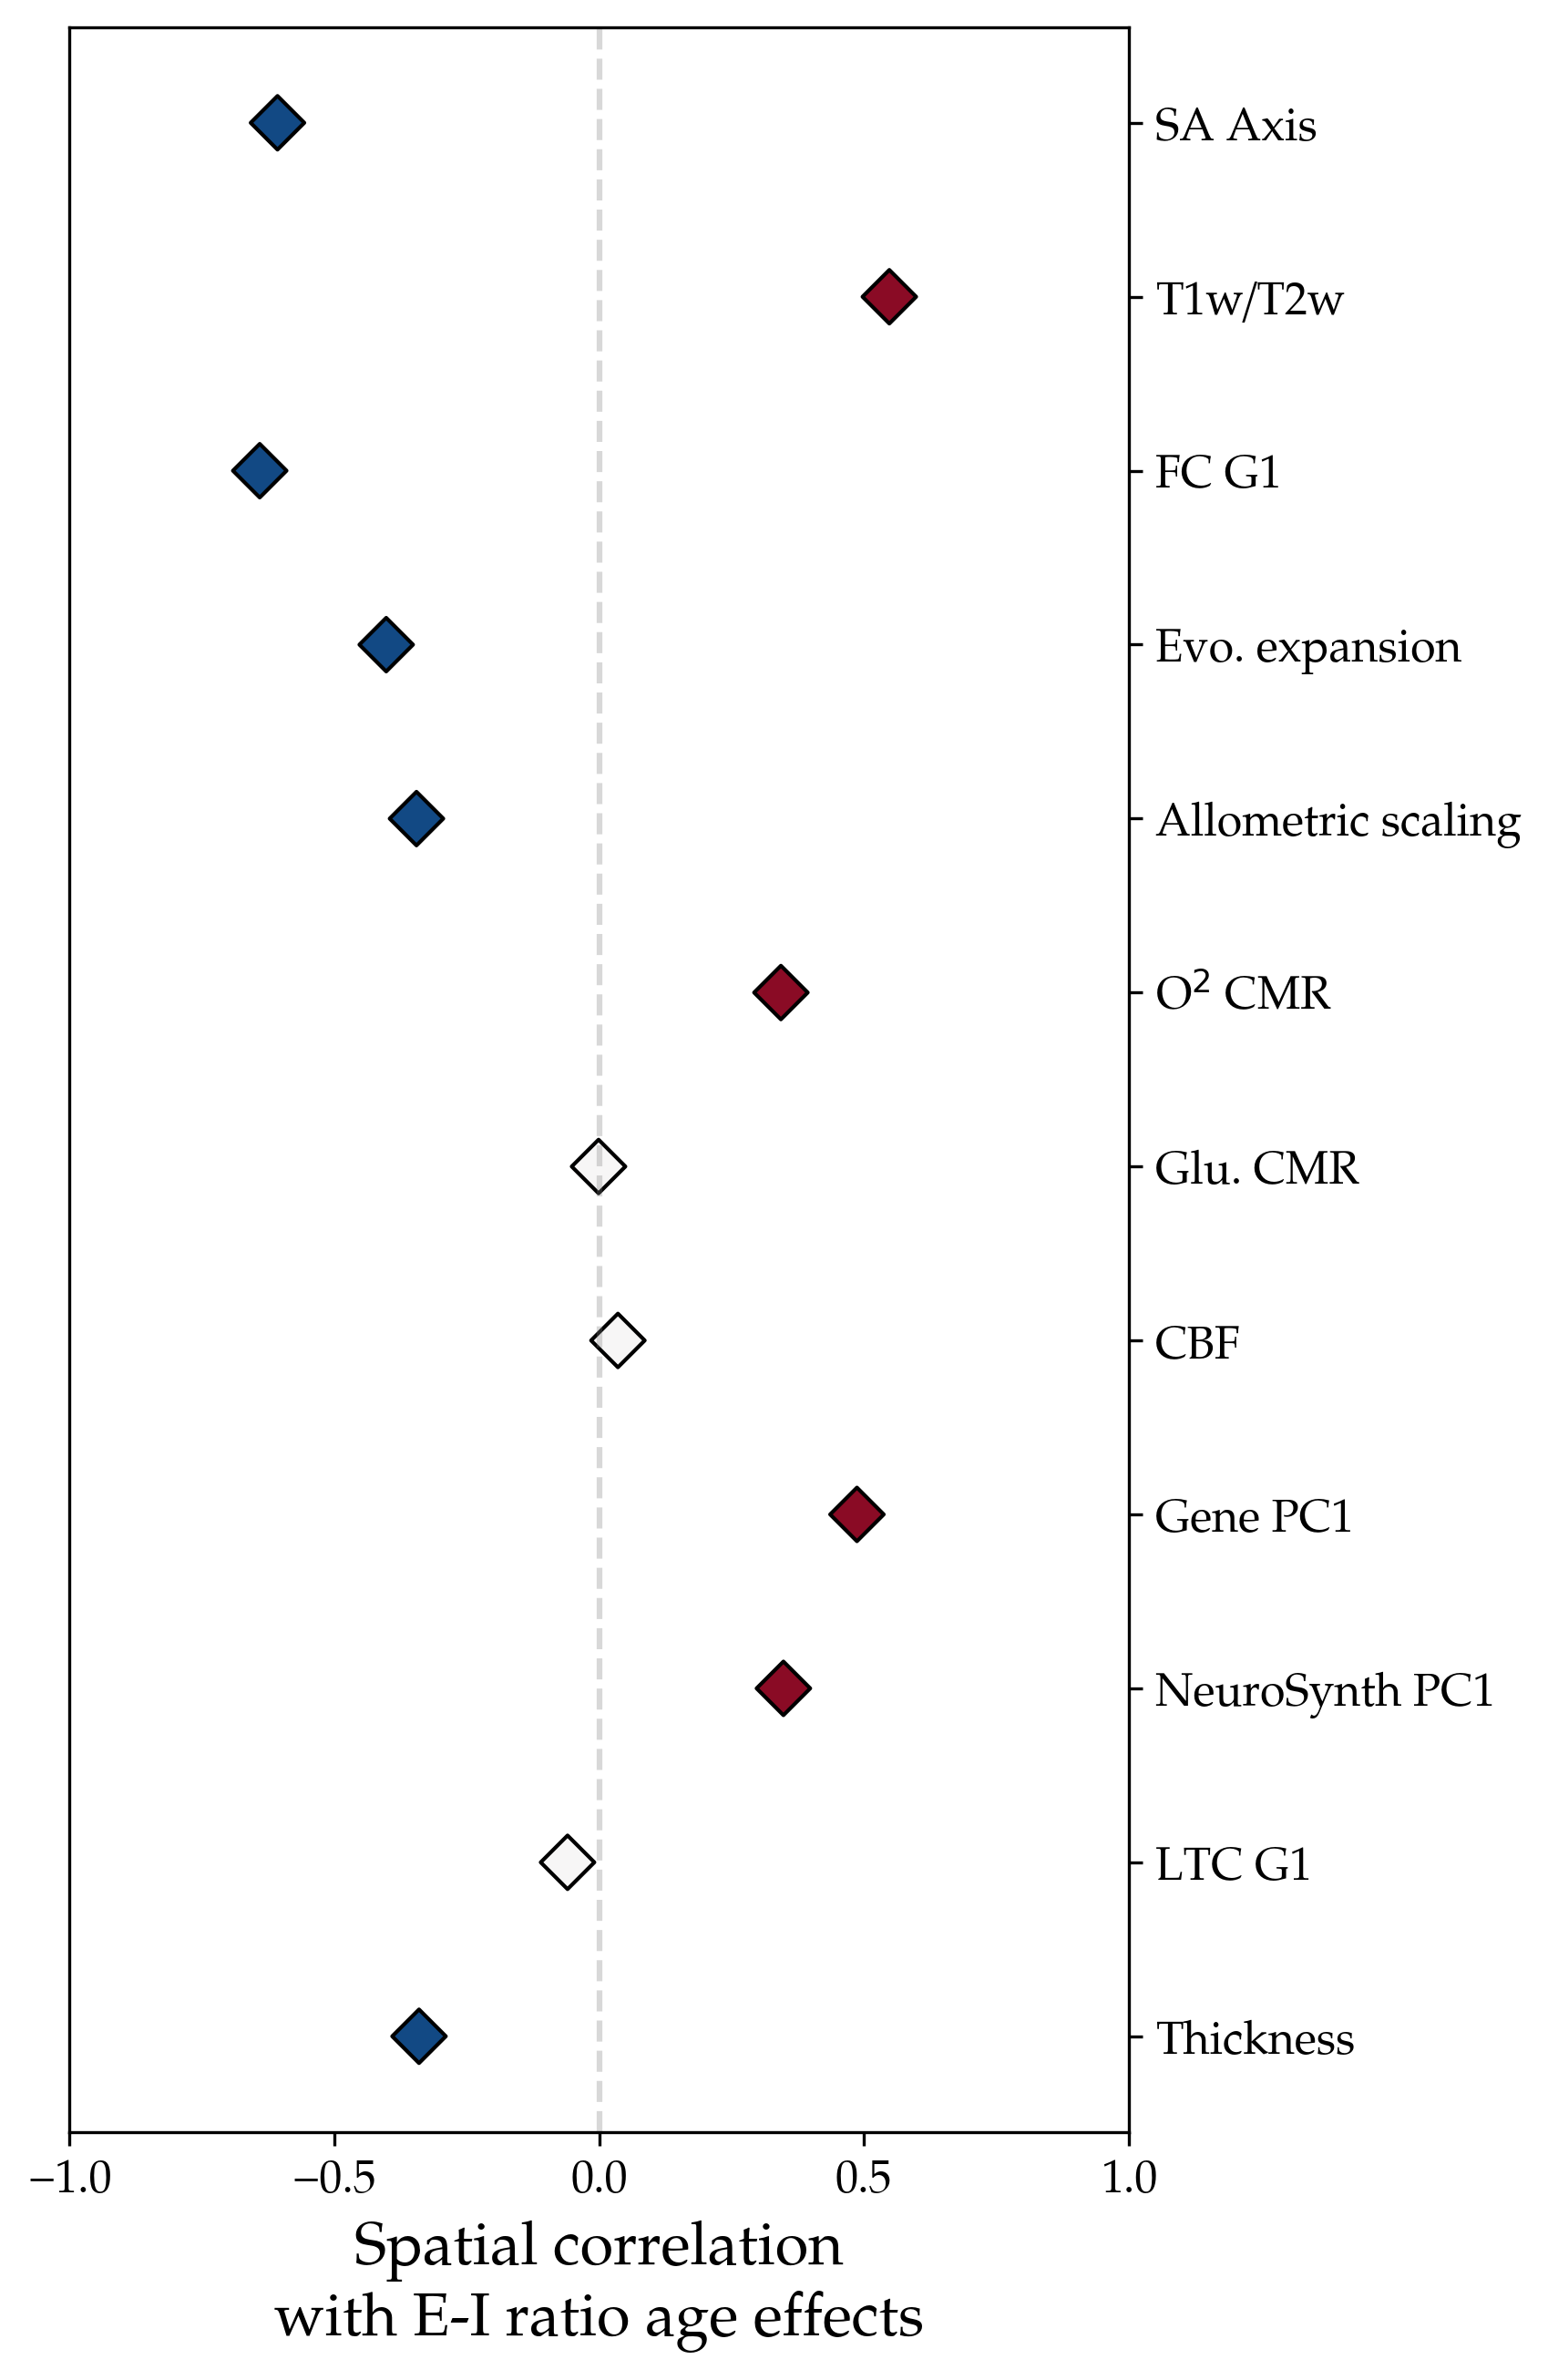

In [22]:
fig, ax = plt.subplots(figsize=(5, 10))
c_array = r_aget_maps.copy()
c_array[p_aget_maps >= 0.05] = 0
c_array[c_array < 0] = -0.9
c_array[c_array > 0] = 0.9
ax.scatter(
    y=r_aget_maps.columns,
    x=r_aget_maps.T.values[:, 0],
    # c=r_aget_maps.T.values[:, 0],
    c=c_array.T.values[:, 0],
    cmap="RdBu_r",
    s=100,
    marker="D",
    edgecolors="black",
    vmin=-1,
    vmax=1,
)
ax.set_ylim(ax.get_ylim()[::-1])  # put T1w/T2w at the top
ax.yaxis.tick_right()
ax.set_xlim([-1, 1])
ax.set_xlabel(
    "Spatial correlation\nwith E-I ratio age effects", fontsize=16
)
ax.set_yticklabels(map_names, rotation=0)
ax.axvline(0, linestyle="--", c="grey", alpha=0.3)

## B. Association with canonical resting state networks

Plot:

Text(273.91666666666663, 0.5, 'Longitudinal effect of age on E-I ratio')

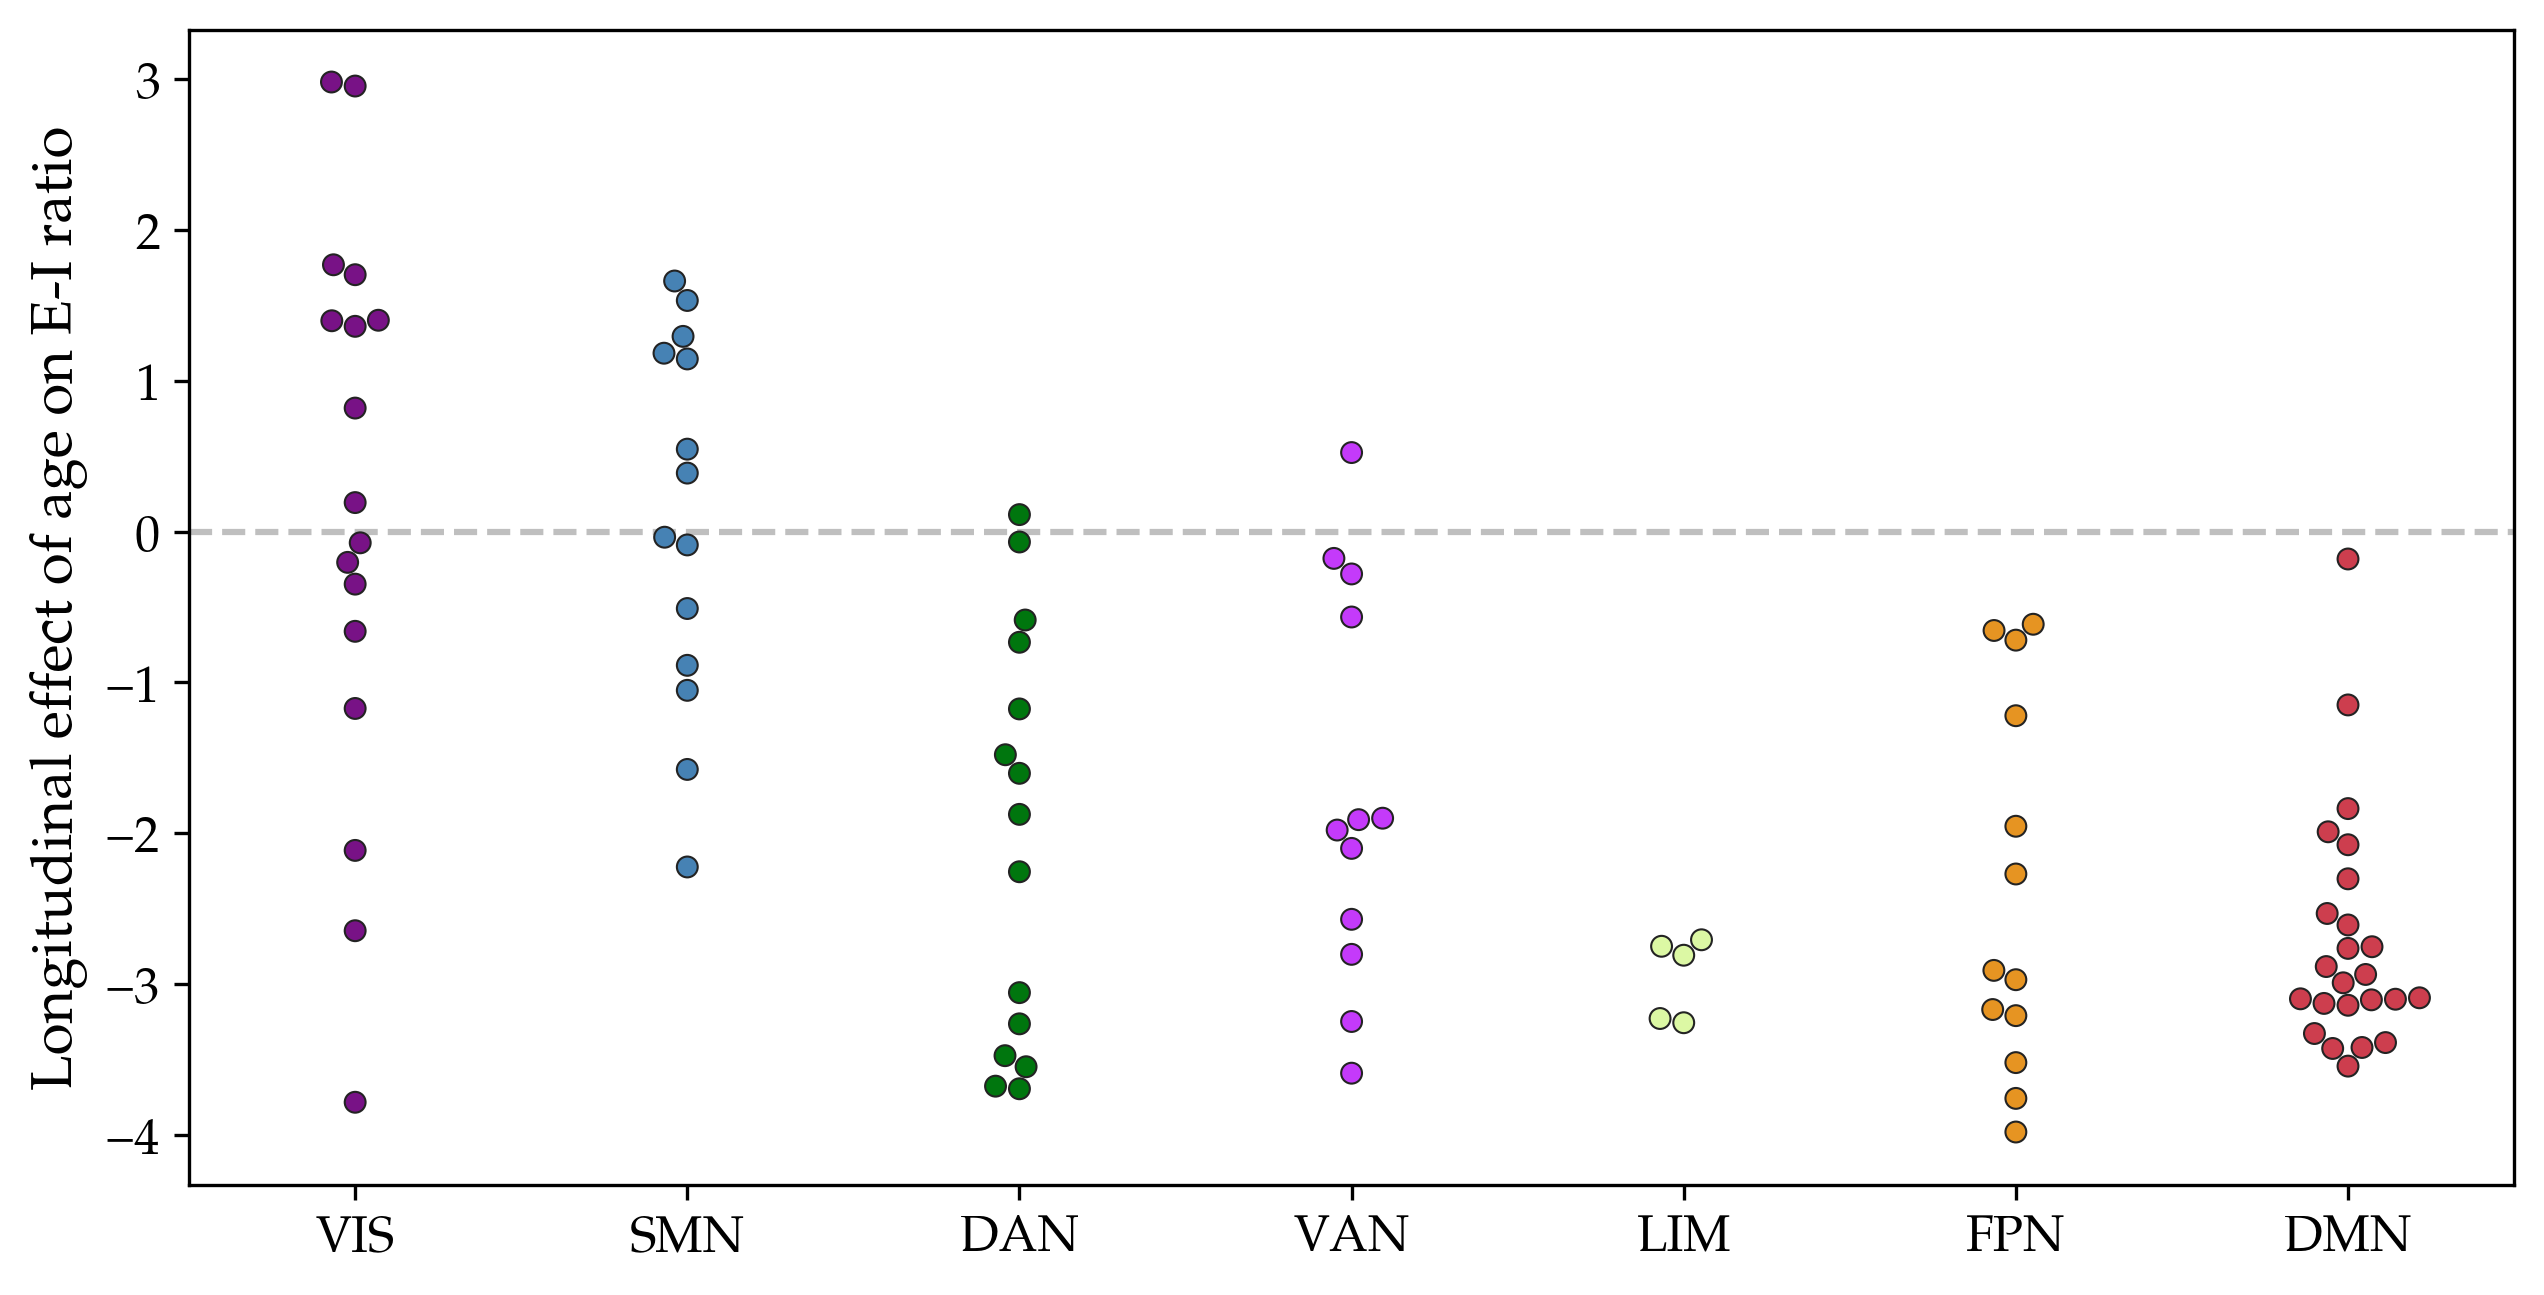

In [23]:
# define Yeo network of each parcel based on its name
yeo = list(map(lambda s: s.split("_")[2], parcels))
yeo_colors = [
    (0.470588, 0.0705882, 0.52549),
    (0.27451, 0.509804, 0.705882),
    (0.0, 0.462745, 0.054902),
    (0.768627, 0.227451, 0.980392),
    (0.862745, 0.972549, 0.643137),
    (0.901961, 0.580392, 0.133333),
    (0.803922, 0.243137, 0.305882),
]

fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, linestyle="--", color="grey", alpha=0.5)
sns.swarmplot(x=yeo, y=stats_age_imagen["t"], palette=yeo_colors, ax=ax, linewidth=0.5)
ax.set_xticklabels(["VIS", "SMN", "DAN", "VAN", "LIM", "FPN", "DMN"])
ax.set_xlabel("")
ax.set_ylabel("Longitudinal effect of age on E-I ratio", fontsize=14)

Spin test:

In [24]:
yeo_categorical = (
    pd.Series(yeo, index=stats_age_imagen.index)
    .astype("category")
    .cat.reorder_categories(
        ["Vis", "SomMot", "DorsAttn", "SalVentAttn", "Limbic", "Cont", "Default"]
    )
)
stats_yeo, p_yeo = stats.anova_spin(
    stats_age_imagen["t"], yeo_categorical, "schaefer-100", n_perm=1000
)
print(p_yeo["F"])

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.39it/s]

0.0


In [25]:
if p_yeo["F"] < 0.05:
    # bonferroni
    alpha = 0.05 / (p_yeo.shape[0] - 1)
    print(p_yeo[p_yeo < alpha])
    print(stats_yeo[p_yeo < alpha])

F                     0.000
Vis-DorsAttn          0.002
Vis-Limbic            0.001
Vis-Default           0.000
SomMot-DorsAttn       0.000
SomMot-SalVentAttn    0.002
SomMot-Limbic         0.000
SomMot-Cont           0.000
SomMot-Default        0.000
dtype: float64
F                     14.571758
Vis-DorsAttn           3.792180
Vis-Limbic             3.665682
Vis-Default            6.775956
SomMot-DorsAttn        4.409423
SomMot-SalVentAttn     3.655717
SomMot-Limbic          5.435879
SomMot-Cont            5.256253
SomMot-Default         8.583460
dtype: float64


## C. Developmental specific expression analysis

Run CSEA tool: (Note: this sends an online request to the tool and will require internet connection + the CSEA tool website must be live)

In [26]:
nlog_dsea_res, p_spin, raw_dsea_res, top_genes, pls = stats.dsea_spin(
    stats_age_imagen[['t']], 'schaefer-100', 
    memmap='imagen_dsea_null_n-1000_seed-0.npy', n_perm=1000,
    seed=0, n_genes=500, fdr=True, pSI="0.05",
    mirror='http://doughertytools.wustl.edu/cgi-bin/seaBrainRegion.cgi',
)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
continuing from permutation 1000


0it [00:00, ?it/s]


Positively-correlated genes:

In [27]:
print(*top_genes[0]["pos"], sep=" ")

AZGP1 KCNIP2 STON1 HDAC4 MLPH ITGA11 LAMA4 BHLHE22 B3GLCT B2M PENK IFNAR2 BACE2 MAP3K14 KIF23 UNC13C MATN3 EIF3E PCOLCE RARG HLA-DPB1 DIP2A NOP53 ANTXR2 MFSD2A WSB1 PAGR1 ABTB2 PATJ MRPS11 TSPAN9 EDNRA CUX1 RCL1 LOC440311 VAV3 SNW1 CEP97 CEACAM19 KIAA2013 CAMK2N2 ARIH2 HLA-J BLMH GLA MGST2 ITM2A MICB ACO1 ARID3B MRNIP MRPS18B COL19A1 CDK5RAP3 MAML3 SEL1L3 SYT6 PIK3IP1 BTN2A2 PCDH11Y TRIP4 TAP1 PRR16 DIDO1 PLAUR MAPKBP1 SPINK8 MYL12A MGC16025 UTRN SNHG17 PRDM8 GOLGA6L10 CCAR1 XKR8 MCM5 CBLB POMT1 DEGS2 LRRC23 ORAI2 PXN ZNF767P ECSCR ROCK1 VIPR2 LOC100190986 INTS6L PARP12 KCTD3 MLXIP VPS13C HLA-F PIGC TBL1Y HHIP-AS1 SCARF2 MAP3K3 LRP8 TUG1 KLHL36 LMO2 HLA-B MACROD1 HLA-C ATP10A COL13A1 CNTNAP5 LSM8 SMCHD1 MYO9B FBXL22 PCNT PLAGL1 ELK3 TANC1 TBL1X BBX MAN2A2 CRYGS MDC1 CEMIP LGR6 PKD1P6-NPIPP1 ARL5A PLK5 PCNA DENND6A SLC5A6 RBM23 CTTNBP2 ZIM2 GOLGA2P5 NXF1 ANKRD13A GUSB CCDC130 UIMC1 KCNN4 MRRF DCLRE1C USP3 DENND4C EEF1D OSGEPL1 NECAB3 FLRT3 TIMM23B HS3ST4 PHACTR4 QRFPR TEPSIN MTG2 RSPO2 

Their aggregate expression:

0 of 284 genes do not exist


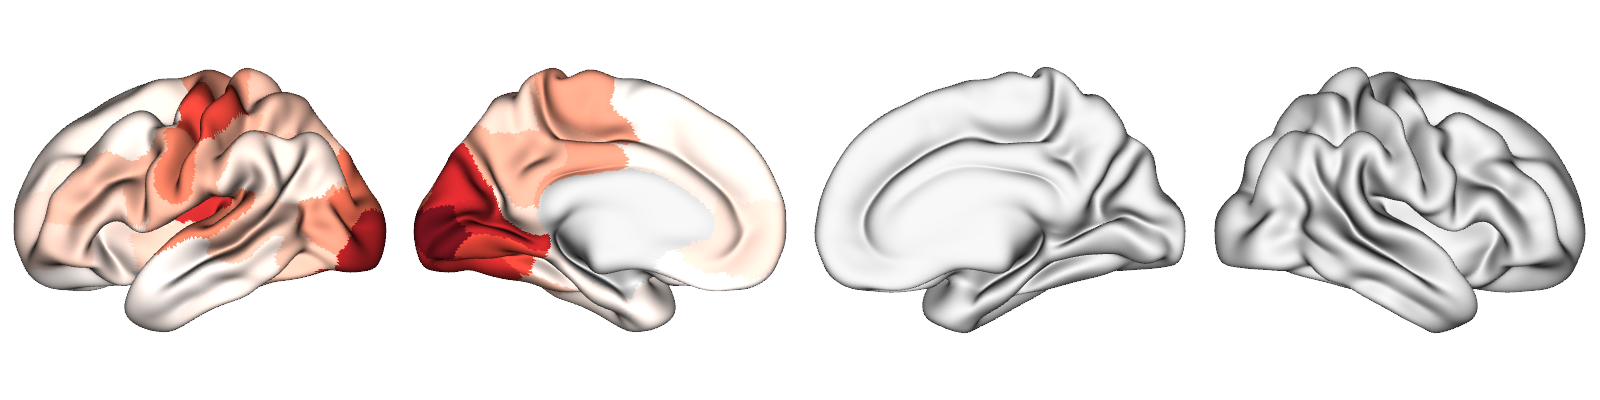

In [28]:
plot.plot_surface(
    transform.deparcellate_surf(
        datasets.load_aggregate_gene_expression(top_genes[0]["pos"], "schaefer-100"),
        "schaefer-100",
        space="fsaverage",
        concat=True,
    ),
    "fsaverage",
    mesh_kind="semi-inflated",
    cmap="Reds",
    cbar=False,
)

Negatively-correlated genes:

In [29]:
print(*top_genes[0]["neg"], sep=" ")

NEUROD6 MYBPC1 ST6GALNAC5 KCNB2 PKD2L1 GALNTL5 TRIM36 CACNB2 TMEM54 KCNV1 SAMD14 ASS1 EFNB2 GULP1 OR14I1 OLFM3 MUM1L1 PLXNA1 SH2D5 EGR3 CBLN4 MYBPC2 ABCC12 VSIG10L CASC10 KCNG3 CDH8 TP53BP2 CD83 CD53 YBX2 LINC01296 CHL1 SH3KBP1 PKP3 C2orf27A STAT6 TMIE GAP43 CAMK1G HTR1E DGKB PIK3CD SURF4 MRO ANKRD30B GRB14 FZD9 TXNRD3 LOC441666 CDC6 THRB MIR100HG SMIM24 SIDT1 CEP126 SV2B FOXN3-AS1 GRM8 STEAP1 LINC01197 SLC22A18 CCDC110 LOC440934 FRS3 MT3 ANO3 SRI PRDM16 PHLDA2 CCKBR NOV XYLT1 MIR99AHG DHRS4 CAPN12 CORT FAS CRYM NDST3 CDC42SE2 ARHGAP28 GPR22 KCNN2 STBD1 TTPAL CACNG3 RANBP3L NEK6 CA10 FAM213B OAF SIGIRR LRRC2 CCNYL1 CALHM1 SPACA9 BAALC SH2D2A CLEC4G DRAP1 BEND5 ASB6 WSB2 ZFP64 KIF17 DDIT4L TM7SF2 C9orf40 RASD1 BEGAIN HDAC9 AP1S1 LOC105374546 SNCG GGN GYG2 TFPT TAMM41 FBXL2 SHC3 TPST1 CARTPT NLE1 KIAA1549 MARC1 F12 NT5DC2 SATL1 GRASP LINC00982 COL11A1 LPL LINC00839 MRPL44 MIR7-3HG CHDH PITHD1 SNX10 HDGFL3 MAPK11 STK17A RNF182 SLC1A4 NT5DC3 HRH1 MAFK HES4 FREM3 ABCC6 GLRA3 PANX1 C2orf74 E

Their aggregate expression:

0 of 216 genes do not exist


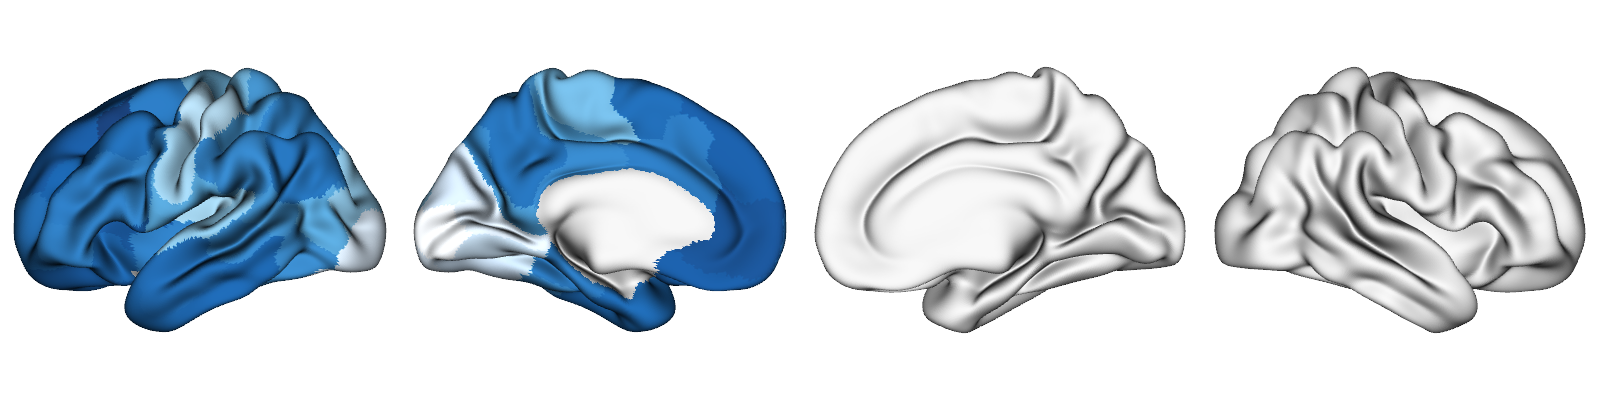

In [30]:
plot.plot_surface(
    transform.deparcellate_surf(
        datasets.load_aggregate_gene_expression(top_genes[0]["neg"], "schaefer-100"),
        "schaefer-100",
        space="fsaverage",
        concat=True,
    ),
    "fsaverage",
    mesh_kind="semi-inflated",
    cmap="Blues",
    cbar=False,
)

Plot negative log p of Fischer exact tests, and indicate significance based on spin test p-values:

<Axes: ylabel='-log(p)'>

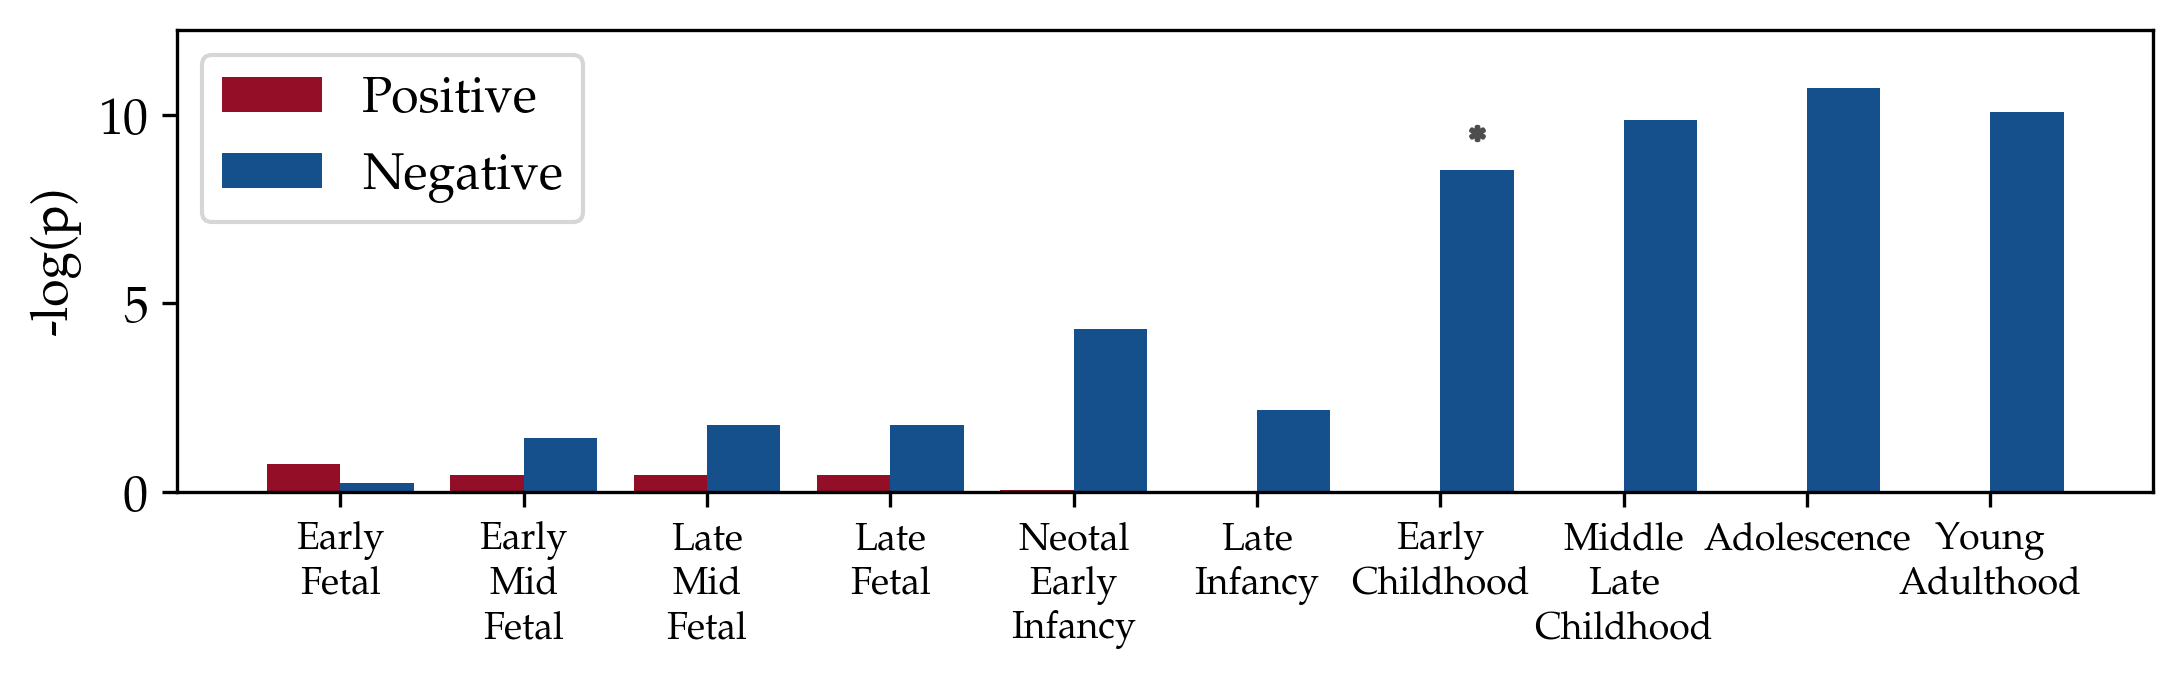

In [33]:
# FDR correction of spin p-values
_, p_fdr_spin = statsmodels.stats.multitest.fdrcorrection(p_spin)
p_fdr_spin = pd.Series(p_fdr_spin, index=p_spin.index)
# plot with significance based on p_fdr_spin < 0.05
sigs = {k: pd.Series(v) for k, v in (p_fdr_spin < 0.05).unstack().to_dict().items()}
stats.dsea_plot(nlog_dsea_res, sigs, colors={'Positive':red, 'Negative':blue})